Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in the dataset: Index(['Date', 'Stock Index', 'Support 1', 'Support 2', 'Resistance 1',
       'Resistance 2', 'Current', 'Pattern'],
      dtype='object')
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.80      0.89         5

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



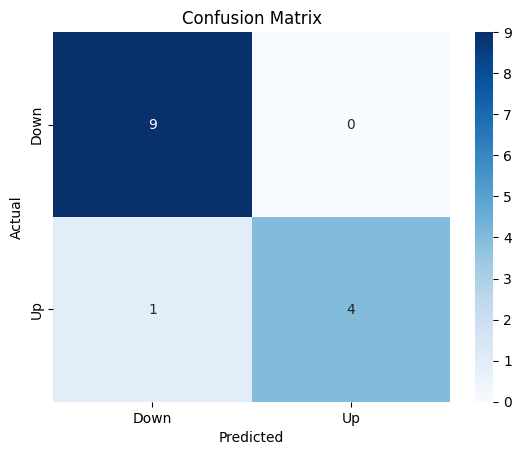

Live Prediction: Down


In [5]:
# Required Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data from Google Drive
file_path = '/content/drive/MyDrive/intern5_stock_data.csv'
data = pd.read_csv(file_path)

# Check and preprocess the data
data.columns = data.columns.str.strip()  # Clean column names
print("Columns in the dataset:", data.columns)

# Impute missing values for numeric columns
numeric_columns = ['Resistance 1', 'Resistance 2', 'Support 1', 'Support 2', 'Current']
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Encode categorical columns (Stock Index, Pattern)
data = pd.get_dummies(data, columns=['Stock Index', 'Pattern'], drop_first=True)

# Feature Engineering
data['Range'] = data['Resistance 2'] - data['Support 2']
data['High'] = data['Resistance 2'] + data['Range'] * 0.1
data['Low'] = data['Support 2'] - data['Range'] * 0.1

# Moving Averages
data['SMA_5'] = data['Current'].rolling(window=5).mean()
data['SMA_20'] = data['Current'].rolling(window=20).mean()

# Lag Features
data['Current_lag1'] = data['Current'].shift(1)
data.dropna(inplace=True)  # Remove rows with NaN after rolling and shifting

# Target Variable (Define your own logic; e.g., price movement classification)
data['Price_Movement'] = np.where(data['Current'] > data['Current_lag1'], 1, 0)

# Define Features and Target
features = ['Resistance 1', 'Resistance 2', 'Support 1', 'Support 2',
            'High', 'Low', 'SMA_5', 'SMA_20', 'Current_lag1'] + \
           [col for col in data.columns if 'Stock Index' in col or 'Pattern' in col]
target = 'Price_Movement'

X = data[features]
y = data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning and Model Training
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Evaluate the Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

def live_predict(input_data):
    """
    Function to accept live input data, preprocess, and make predictions.
    """
    # Convert input data to a DataFrame with the same column names
    input_df = pd.DataFrame([input_data], columns=features)

    # Scale the input data
    input_scaled = scaler.transform(input_df)

    # Predict using the trained model
    prediction = best_model.predict(input_scaled)

    return "Up" if prediction[0] == 1 else "Down"

# Example Real-Time Prediction
sample_input = X_test.iloc[0].tolist()  # Replace with real-time input data
print("Live Prediction:", live_predict(sample_input))



Accuracy: 0.93
Precision: 1.00
Recall: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.80      0.89         5

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



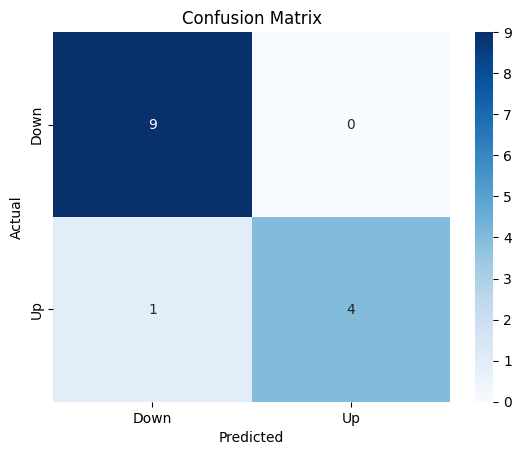

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Evaluate the Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


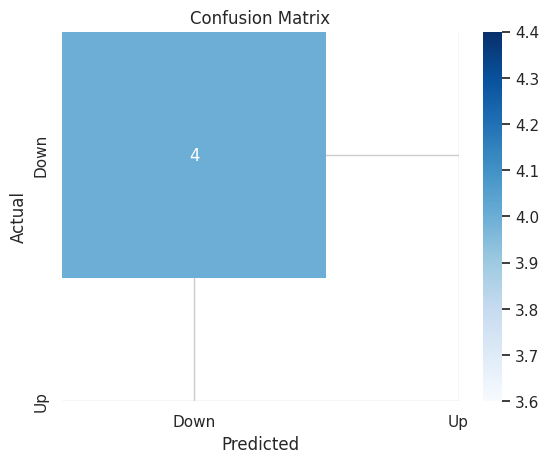

Live Prediction: Down


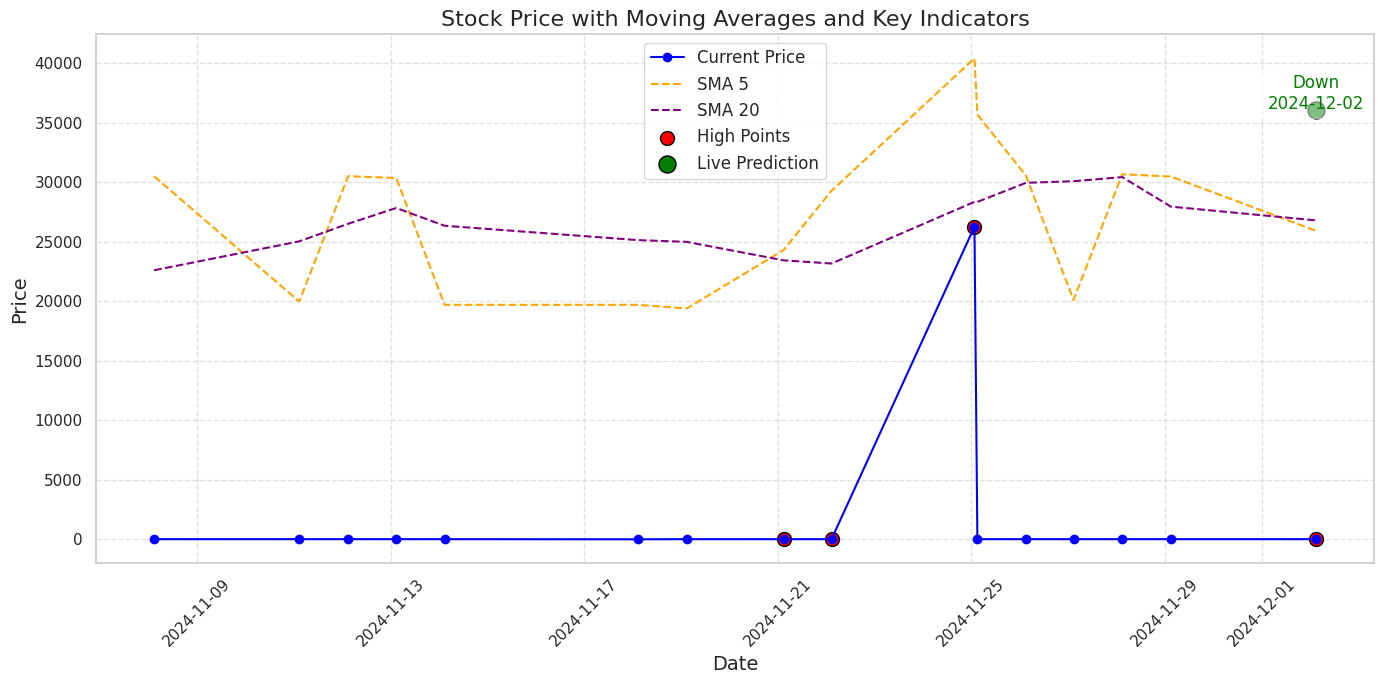

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Mount Google Drive to access the CSV file
drive.mount('/content/drive')

# Define the path to the CSV file
file_path = '/content/drive/MyDrive/intern5_stock_data.csv'  # Replace with your actual path

# Load the data
data = pd.read_csv(file_path)

# Clean column names (strip any leading/trailing spaces)
data.columns = data.columns.str.strip()

# Ensure 'Date' is in datetime format and sort by date
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.sort_values('Date')

# Impute missing values for numeric columns
numeric_columns = ['Resistance 1', 'Resistance 2', 'Support 1', 'Support 2', 'Current']
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Feature Engineering: Moving Averages and Lag Features
data['SMA_5'] = data['Current'].rolling(window=5).mean()
data['SMA_20'] = data['Current'].rolling(window=20).mean()
data['Current_lag1'] = data['Current'].shift(1)

# Drop rows with NaN after rolling and shifting
data.dropna(inplace=True)

# Create a new column for price movement (target variable)
data['Price_Movement'] = np.where(data['Current'] > data['Current_lag1'], 1, 0)

# Define features and target
features = ['Resistance 1', 'Resistance 2', 'Support 1', 'Support 2', 'SMA_5', 'SMA_20', 'Current_lag1']
target = 'Price_Movement'
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an XGBoost model with hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Live prediction function
def live_predict(input_data):
    """
    Accepts live input data, preprocesses it, and makes a prediction using the trained model.
    """
    # Convert input data to a DataFrame
    input_df = pd.DataFrame([input_data], columns=features)

    # Scale the input data
    input_scaled = scaler.transform(input_df)

    # Make the prediction
    prediction = best_model.predict(input_scaled)

    return "Up" if prediction[0] == 1 else "Down"

# Example real-time prediction
sample_input = X_test.iloc[0].tolist()  # Replace this with real-time input data if necessary
prediction_date = data['Date'].iloc[-1]  # Assume the last date in the dataset is the date of live prediction
live_prediction = live_predict(sample_input)
print("Live Prediction:", live_prediction)

# Plotting the stock data with moving averages and high points
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Current'], label='Current Price', color='blue', marker='o')
plt.plot(data['Date'], data['SMA_5'], label='SMA 5', linestyle='--', color='orange')
plt.plot(data['Date'], data['SMA_20'], label='SMA 20', linestyle='--', color='purple')

# Add markers for key points (e.g., high points)
high_points = data[data['Current'] == data['Current'].rolling(window=5).max()]['Date']
high_point_data = data[data['Date'].isin(high_points.tolist())]

plt.scatter(high_point_data['Date'], high_point_data['Current'], color='red', label='High Points', s=100, edgecolor='black')

# Highlight the live prediction point with offset for clarity
plt.scatter(prediction_date, sample_input[0], color='green', label='Live Prediction', s=150, edgecolor='black')
plt.text(prediction_date, sample_input[0] + 100, f'{live_prediction}\n{prediction_date.strftime("%Y-%m-%d")}',
         fontsize=12, color='green', ha='center', bbox=dict(facecolor='white', alpha=0.5))

# Add titles and labels
plt.title('Stock Price with Moving Averages and Key Indicators', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
